In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
pip install xgboost

     -------------------------------------- 150.0/150.0 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
from xgboost import XGBRegressor

In [8]:
calories = pd.read_csv('C:\\Users\\hi\\Downloads\\archive\\calories.csv')
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [7]:
ex = pd.read_csv('C:\\Users\\hi\\Downloads\\archive\\exercise.csv')
ex

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [9]:
# Combining the two dataframe
cal = pd.concat([ex,calories['Calories']],axis=1)

In [10]:
cal

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [11]:
cal.shape

(15000, 9)

In [12]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
cal.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [16]:
cal.duplicated().sum()

0

In [19]:
cal.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Analysis

In [20]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

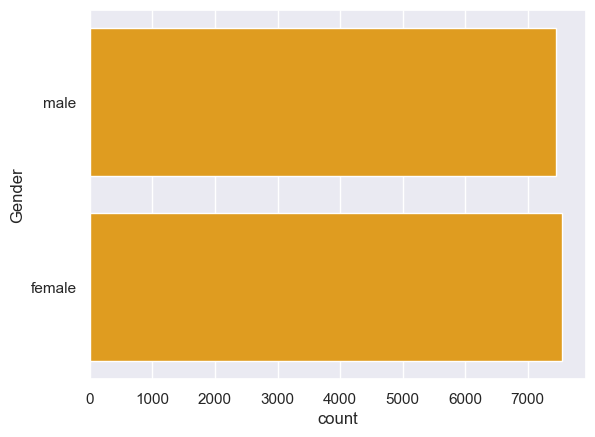

In [23]:
sns.countplot(cal['Gender'],color='orange')

C:\Users\hi\AppData\Local\Temp\ipykernel_24488\35134665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cal['Age'],hist=False)


<Axes: xlabel='Age', ylabel='Density'>

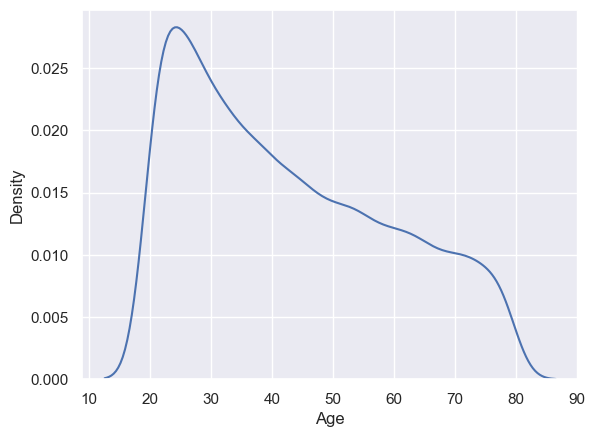

In [24]:
sns.distplot(cal['Age'],hist=False)

C:\Users\hi\AppData\Local\Temp\ipykernel_24488\2108497355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cal['Duration'],hist=False)


<Axes: xlabel='Duration', ylabel='Density'>

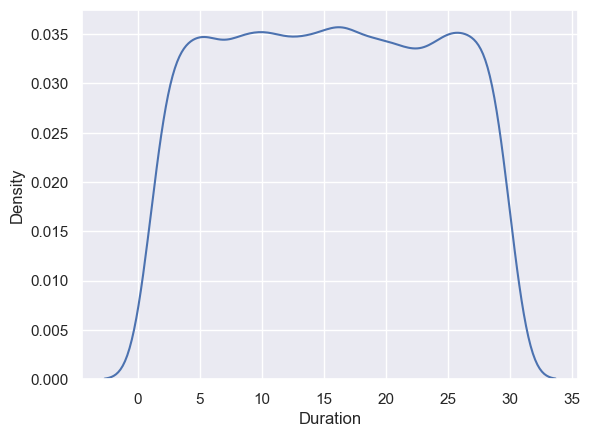

In [27]:
sns.distplot(cal['Duration'],hist=False)

<Axes: xlabel='Calories', ylabel='Weight'>

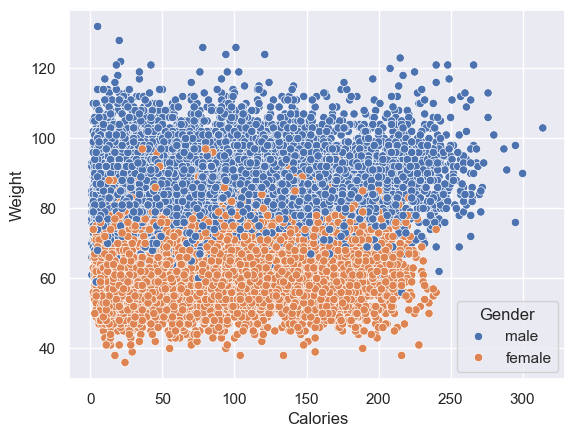

In [41]:
sns.scatterplot(x=cal['Calories'] , y=cal['Weight'],hue=cal['Gender'])

<Axes: xlabel='Age', ylabel='Duration'>

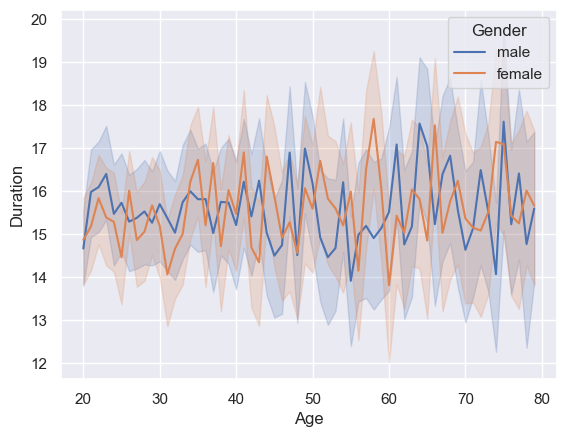

In [48]:
sns.lineplot(x=cal['Age'],y=cal['Duration'],hue=cal['Gender'])

<Axes: xlabel='Heart_Rate', ylabel='Height'>

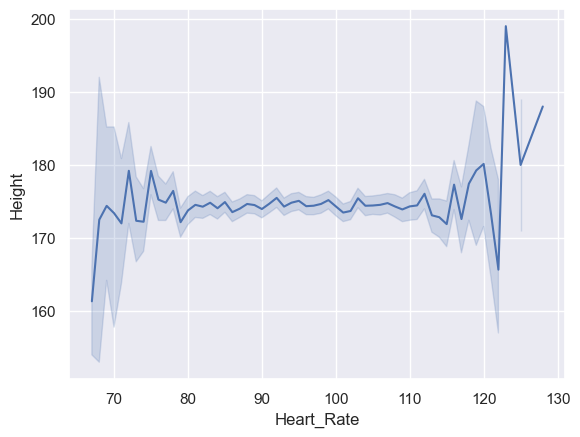

In [50]:
sns.lineplot(x=cal['Heart_Rate'],y=cal['Height'])

In [55]:
numeric_df = cal.select_dtypes(include=[int, float])
correlation = numeric_df.corr()

<Axes: >

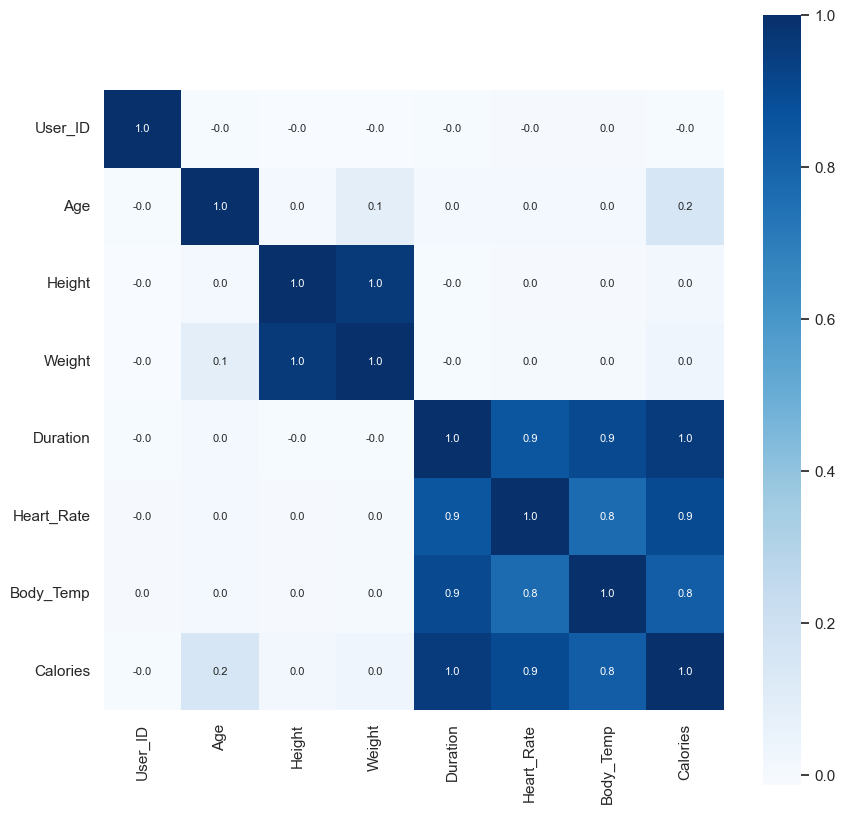

In [56]:

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [57]:
cal.replace({"Gender":{'male':0,'female':1}}, inplace=True)

C:\Users\hi\AppData\Local\Temp\ipykernel_24488\1818395200.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cal.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [58]:
cal

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [92]:
selected_features = ['Gender', 'Age', 'Height', 'Weight', 'Duration']
X = cal[selected_features]
y = cal['Calories']

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [95]:
x_train.shape

(12000, 5)

In [94]:
# Model Training
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Evaluation

In [96]:
y_pred = model.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"✅ Model trained. Mean Absolute Error: {mae:.2f} calories")

✅ Model trained. Mean Absolute Error: 8.55 calories


# Saving the model

In [97]:
import pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("✅ Model saved as 'xgb_model.pkl'")

✅ Model saved as 'xgb_model.pkl'


# Load Model and Predict from User Input

In [98]:
with open('xgb_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

def collect_user_input():
    print('\n🔵 Enter the details for Calories Prediction:')

    Gender_input = input('Gender (male/female): ').strip().lower()
    if Gender_input == 'male':
        Gender = 0
    elif Gender_input == 'female':
        Gender = 1
    else:
        raise ValueError(" Gender must be 'male' or 'female'")
        
    Age = int(input("Age (in years): "))
    Height = float(input("Height (in cm): "))
    Weight = float(input("Weight (in kg): "))
    Duration = float(input("Exercise Duration (in minutes): "))
    
    input_data = (Gender, Age, Height, Weight, Duration)
    np_array = np.asarray(input_data).reshape(1, -1)
    return np_array

# Predict
user_data = collect_user_input()
prediction = xgb_model.predict(user_data)
print(f" Predicted Calories Burned: {prediction[0]:.2f} calories")


🔵 Enter the details for Calories Prediction:
Gender (male/female): male
Age (in years): 22
Height (in cm): 172
Weight (in kg): 84
Exercise Duration (in minutes): 45
 Predicted Calories Burned: 207.38 calories
